# Content
* import dataset
* dataset visualization
* train test split
* finding best k value
* KNN value


kaggle = https://www.kaggle.com/code/umutsefkansak/knn-algorithm-with-90-accuracy

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# 1. Dataset

In [25]:
df = pd.read_csv("column_2C_weka.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [26]:
print("total null values : ",df.isnull().sum().sum())

total null values :  0


# 2. Data visualization

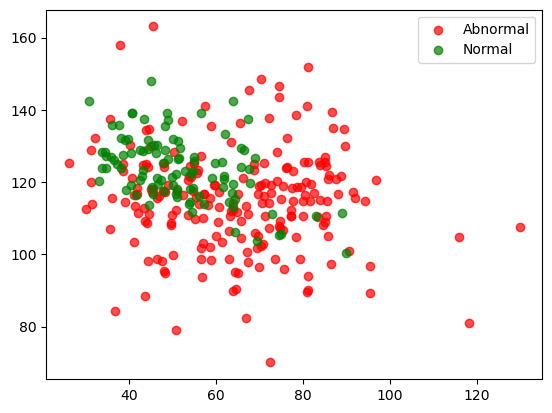

In [27]:
abnormal = df[df["class"] == "Abnormal"]
normal = df[df["class"] == "Normal"]

plt.scatter(abnormal.pelvic_incidence,abnormal.pelvic_radius, color = "red", label = "Abnormal",alpha = 0.7)
plt.scatter(normal.pelvic_incidence,normal.pelvic_radius, color = "green",label = "Normal",alpha = 0.7)
plt.legend()
plt.show()

# 3. Train Test Split

In [59]:
x = df.drop(["class"],axis=1)
y = df["class"].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 5)

# Finding best k value

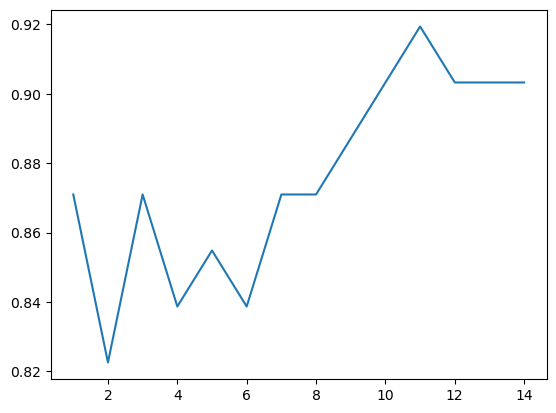

In [60]:
from sklearn.neighbors import KNeighborsClassifier

score_list = []

for i in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test.values,y_test))

plt.plot(range(1,15),score_list)
plt.show()


we can see best k value in the plot, let's see in code

In [61]:

best_k = 0

for i in range(len(score_list)):
    if score_list[i] > score_list[best_k]:
        best_k = i

best_k = best_k + 1 # because score_list[0] k=1, score_list[1] k=2,...,score_list[n] k=n+1

print(score_list)
print("Best k value: ",best_k)


[0.8709677419354839, 0.8225806451612904, 0.8709677419354839, 0.8387096774193549, 0.8548387096774194, 0.8387096774193549, 0.8709677419354839, 0.8709677419354839, 0.8870967741935484, 0.9032258064516129, 0.9193548387096774, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129]
Best k value:  11


In [62]:
# KNN model

knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(x_train,y_train)

print("{} nn accuracy: {} ".format(best_k,knn.score(x_test.values,y_test)))

11 nn accuracy: 0.9193548387096774 
